# Decision trees

Examples taken from

1. Scikit-Learn [web site](http://scikit-learn.org/stable/modules/tree.html)
2. [Jake Vanderplas'](https://github.com/jakevdp/sklearn_pycon2015/blob/master/notebooks/03.2-Regression-Forests.ipynb) Jupyter notebook examples

In [82]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from matplotlib.colors import ListedColormap

from IPython.core.display import HTML
HTML("<style>.container { width:100% !important; }</style>")

    1. Load Iris data
    2. Summarize data
    3. Plot Sepal length and Sepal width
    4. Use decision tree with different depths

Load the Iris data set

In [83]:
from sklearn import datasets
iris = datasets.load_iris()

The Iris data set has four features (sepal length, sepal width, petal length, petal width) which can be used to classify Iris flowers into three species denoted as "0", "1", "2" (setosa, versicolor, virginica)

In [84]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_names'] = df.species
df.replace({'species_names':{
            0:iris['target_names'][0],
            1:iris['target_names'][1],
            2:iris['target_names'][2]            
        }}, inplace=True)
df.columns = [item.replace(' (cm)', '') for item in df.columns]
df.head()

,sepal length,sepal width,petal length,petal width,species,species_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


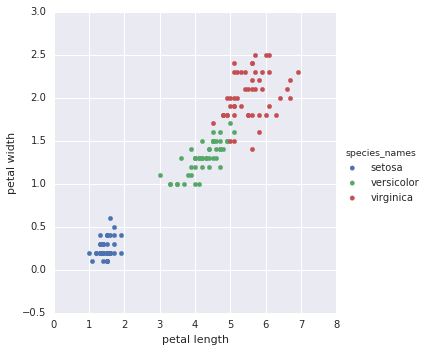

In [85]:
g = sns.FacetGrid(df, hue='species_names', size=5)
g.map(plt.scatter, 'petal length', 'petal width')
g.add_legend()

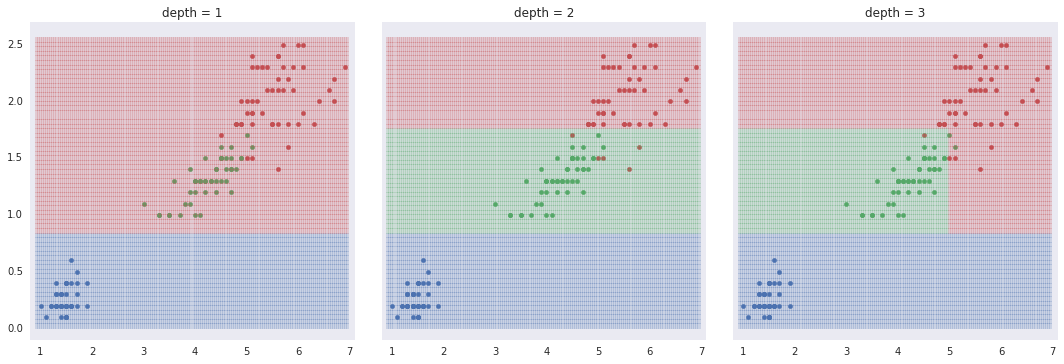

In [101]:
step = 0.04
from sklearn import tree
X = df[['petal length', 'petal width']]
y = df.species
    
def mesh_plot(x, y, species, ax, clf):
    values = species.unique()
    colors = sns.color_palette()[:len(values)]
    xx, yy = np.meshgrid(
        np.arange(x.min() - 0.1, x.max() + 0.1, step),
        np.arange(y.min() - 0.1, y.max() + 0.1, step))
    mesh_predict = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    mesh_predict = mesh_predict.reshape(xx.shape)
    for i in range(len(colors)):
        ax.scatter(x[df.species == values[i]], y[df.species == values[i]], color=colors[i])
        ax.set_xlim(x.min() - 0.2, x.max() + 0.2)
        ax.set_ylim(y.min() - 0.2, y.max() + 0.2)
    ax.pcolormesh(xx, yy, mesh_predict,
        cmap=ListedColormap(sns.color_palette()[:3]), alpha=0.2)
    ax.set_title('depth = {}'.format(clf.max_depth))

fig, ax = plt.subplots(1, 3, sharey=True, figsize=(15, 5), squeeze=True)
fig.tight_layout()

for idx in range(0, 3):
    clf = tree.DecisionTreeClassifier(max_depth=idx + 1, random_state=0).fit(X, df.species)
    mesh_plot(df['petal length'], df['petal width'], df.species, ax[idx], clf)

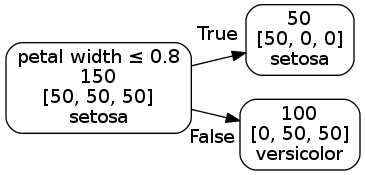

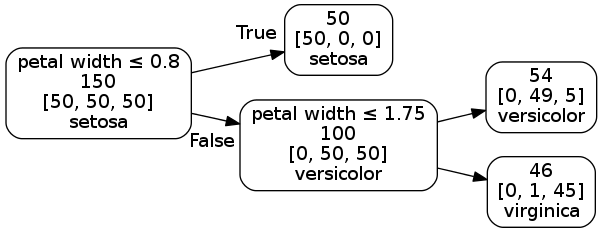

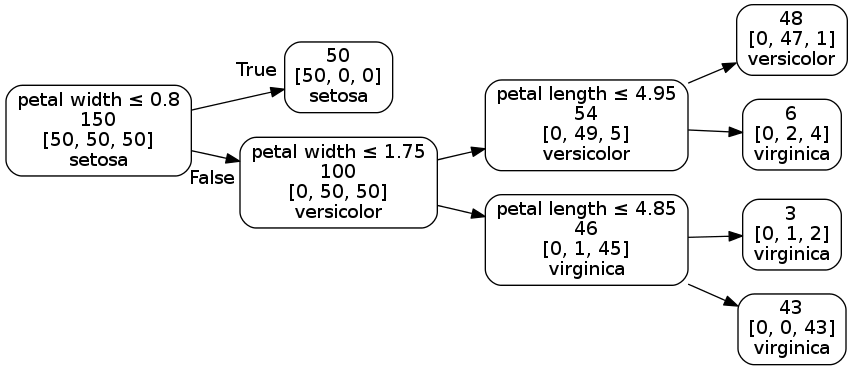

In [102]:
import pydotplus
from IPython.display import Image, display

def plot_tree(clf):
    dot_data = StringIO()
    tree.export_graphviz(
        clf, out_file=dot_data, 
        feature_names=['petal length', 'petal width'],
        label=None, class_names=iris.target_names,
        filled=False, rounded=True, special_characters=True,
        impurity=False, rotate=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

for idx in range(0, 3):
    clf = tree.DecisionTreeClassifier(max_depth=idx + 1, random_state=0).fit(X, df.species)
    png = plot_tree(clf)
    display(Image(png))